In [1]:
import uuid
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [2]:
from svgpathtools import Path, Line, QuadraticBezier, CubicBezier, Arc
from svgpathtools import svg2paths2, wsvg
from lxml import etree

In [3]:
from IPython.core.display import HTML, SVG, display

In [4]:
w, h = 1000, 1000

In [5]:
def show_paths(paths, w=1000, h=1000, color='#000000', background_img=None, save=None):
    r = etree.Element(
        "svg", width=str(int(w)), height=str(int(h)), xmlns="http://www.w3.org/2000/svg"
    )
    
#     if background_img is not None:
#         obj = etree.fromstring(f'<image xlink:href="{background_img}" width="100%" height="100%" x="0" y="0"/>')
#         r.append(obj)
    
    for p in paths:
        i = uuid.uuid4()
        d = Path(p).d() if not isinstance(p, Path) else p.d()

        obj = etree.fromstring(f'<path id="{i}" stroke="{color}" fill="none" d="{d}" />')
        r.append(obj)
    display_str = etree.tostring(r).decode('utf-8')
    
    if save is not None:
        f = open(save, 'w')
        f.write(display_str)
        f.close()
    
    display(SVG(display_str))

In [6]:
def wallpaper_lines(angle, w, h, gap=5.):
    if angle >= 0 and angle < 45:
        run_vertical = True
    elif angle >= 45 and angle < 135:
        run_vertical = False
    elif angle >= 135 and angle < 225:
        run_vertical = True
    else:
        run_vertical = False
        
    r1 = np.sin((angle + 180) * 0.01745329) * (h * 2)
    c1 = np.cos((angle + 180) * 0.01745329) * (w * 2)
    r2 = np.sin(angle * 0.01745329) * (h * 2)
    c2 = np.cos(angle * 0.01745329) * (w * 2)
    ref = Line(complex(c1, r1), complex(c2, r2))
    t1 = complex(np.cos((angle + 90) * 0.01745329) * gap, np.sin((angle + 90) * 0.01745329) * gap)
    t2 = complex(np.cos((angle - 90) * 0.01745329) * gap, np.sin((angle - 90) * 0.01745329) * gap)
    
    paths = []
    for i in range(0, int(w + h), int(gap)):
        l1, l2 = (Line(complex(c1, r1), complex(c2, r2)).translated(t1 * i),
                  Line(complex(c1, r1), complex(c2, r2)).translated(t2 * i))
        
        if i:
            paths += [l1, l2]
        else:
            paths += [l1]
    
    return paths

In [ ]:
background = 

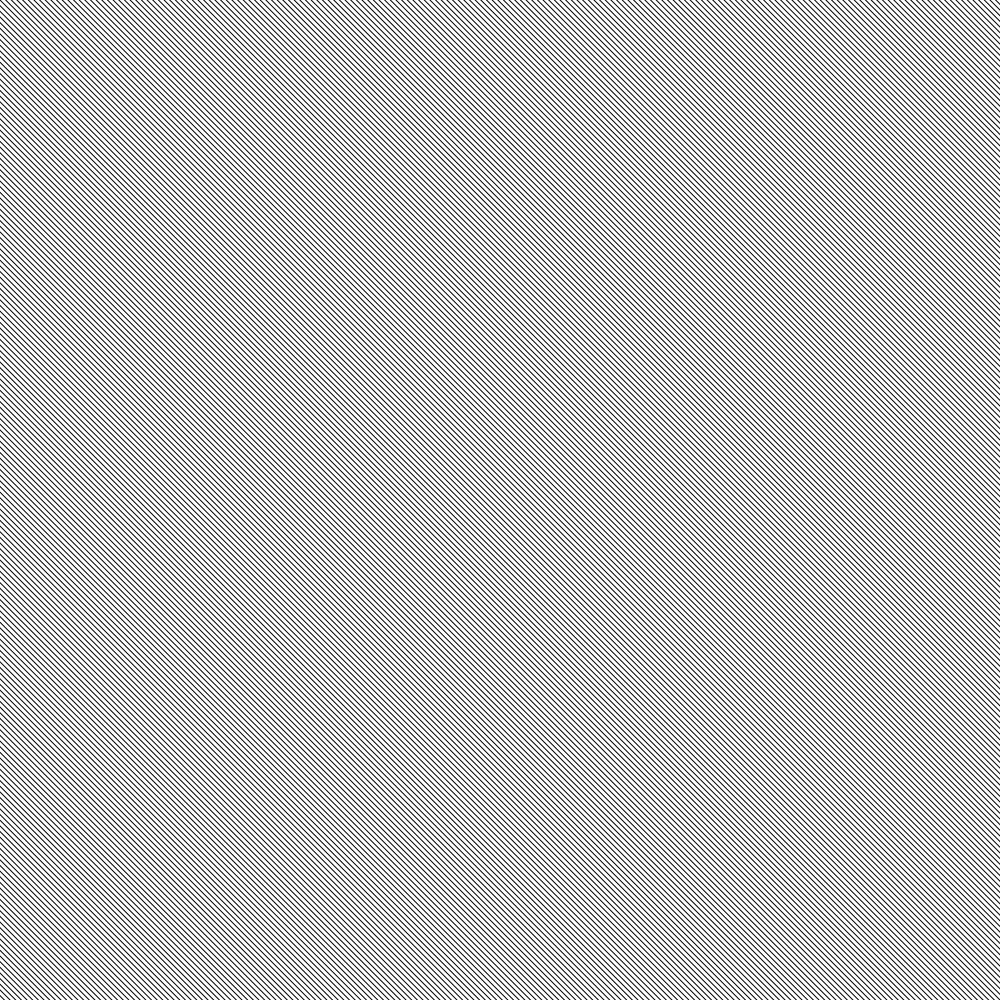

In [145]:
gap = 2.
xs = wallpaper_lines(45, w, h, gap=gap)
show_paths(xs, save='../data/cross_hatching/v1/1.svg')

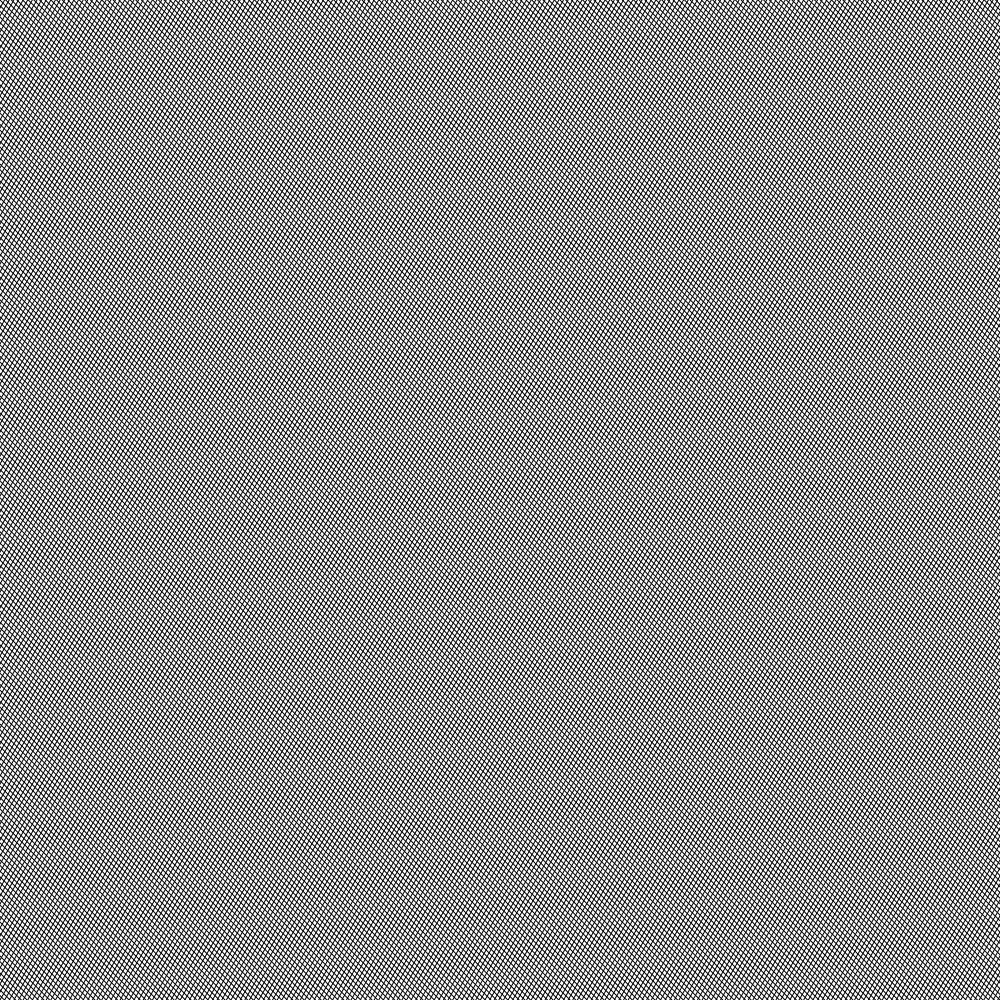

In [146]:
ys = wallpaper_lines(120, w, h, gap=gap)
show_paths(xs + ys, save='../data/cross_hatching/v1/2.svg')

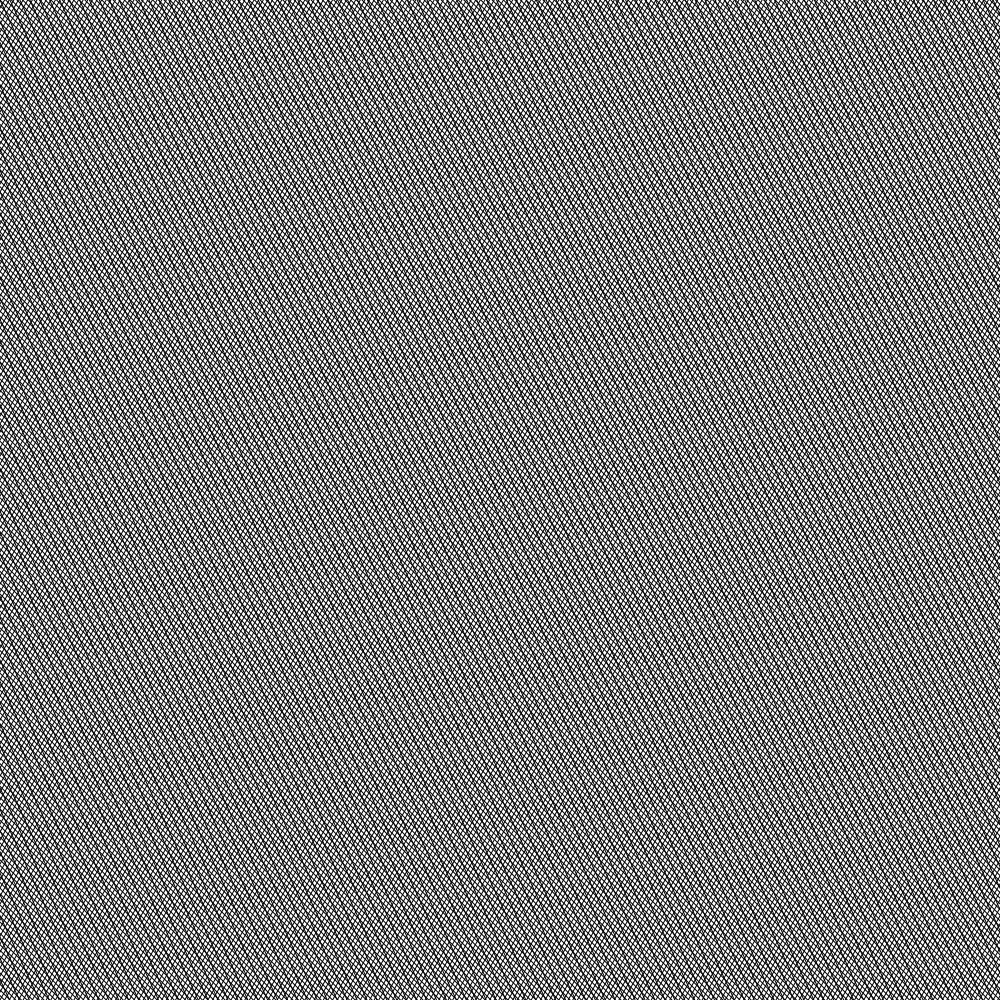

In [147]:
zs = wallpaper_lines(65, 1000, 1000, gap=3.)
show_paths(xs + ys + zs, save='../data/cross_hatching/v1/3.svg')